# **Titanic Survival Prediction**

**Dependencies and data import**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

In [2]:
SEED = 11

In [3]:
file_path =r"C:\Users\user pc\Desktop\My Projects\Titanic Survival Dataset\train.csv"
df_train = pd.read_csv(file_path,index_col=0)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
file_path = r'C:\Users\user pc\Desktop\My Projects\Titanic Survival Dataset\test.csv'
df_test = pd.read_csv(file_path,index_col=0)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **EDA and Data Cleaning**

### **Data Cleaning**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# checking for the number of missing values
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# dropping th Cabin column
df_train.drop(columns=['Cabin'],inplace=True)

In [ ]:
# imputting the Embarked missing values with the median class
df_train.fillna({'Embarked':'S'},inplace=True)

In [9]:
# filtering dataframe for missing values
df_train[df_train.isna().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


**Approaches for imputing the passenger age**

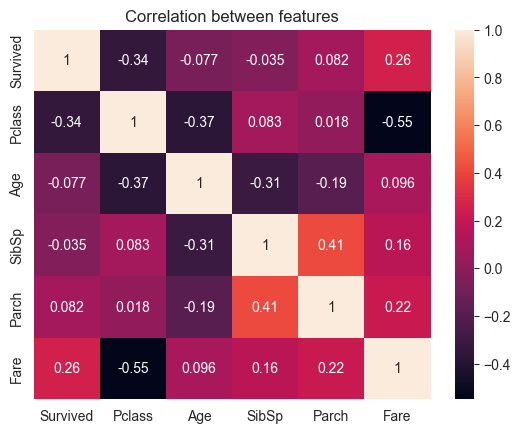

In [10]:
sns.heatmap(df_train.select_dtypes(['int64','Float64']).corr(),annot=True)
plt.title('Correlation between features')
plt.show();

No feature has a strong correlation with age hence we cannot groupby any of those features to determines a measure of central tendency to impute with or use KNNImputation.

In [ ]:
# imputation based of the title
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

| Title      | Meaning                                                |
|------------|-------------------------------------------------------|
| **Mr**     | Used for adult males.                                 |
| **Mrs**    | Used for married females.                             |
| **Miss**   | Traditionally used for unmarried females.            |
| **Master** | Used for young boys (usually under 12 years old).   |
| **Don**    | A title of respect used in Spanish-speaking cultures. |
| **Rev**    | Short for Reverend, indicating a clergy member.      |
| **Dr**     | Short for Doctor, indicating a medical professional.  |
| **Mme**    | Abbreviation for "Madame," used for married women in French. |
| **Ms**     | A neutral title used for women regardless of marital status. |
| **Major**  | A military title, indicating rank.                    |
| **Lady**   | A title of respect for women, often used in British nobility. |
| **Sir**    | A title of respect, typically for a knight or high rank. |
| **Mlle**   | Short for "Mademoiselle," used for young unmarried women in French. |
| **Col**    | Short for Colonel, a military rank.                   |
| **Capt**   | Short for Captain, typically a military or naval rank. |
| **Countess** | A title for a female nobleman equivalent to a count. |
| **Jonkheer** | A Dutch title of nobility, typically indicating a young nobleman. |


In [ ]:
# imputing age basedof the titles of the passengers
title_median_age = df_train.groupby('Title')['Age'].median()
age_impute_dict = title_median_age.to_dict()
age_impute_dict

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 46.5,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 3.5,
 'Miss': 21.0,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 30.0,
 'Mrs': 35.0,
 'Ms': 28.0,
 'Rev': 46.5,
 'Sir': 49.0}

In [ ]:
# imputing the values based of the median age of each title
for index in df_train.index: # looping through the table
  # checking whether its missing
  if pd.isna(df_train.at[index,'Age']): # selecting entries with missing entries for age
    # imputing the missing values for age with te median age for each titlke category
    title = df_train.at[index,'Title']
    df_train.at[index,'Age'] = age_impute_dict.get(title)
  
assert df_train.isna().sum().values.sum() == 0

**Checking for inconsistencies in categorical columns**

In [14]:
categorical_columns = ['Pclass','Sex','Embarked','Title']
for col in categorical_columns:
  print(f'{col}:\n')
  print(df_train[col].unique())

Pclass:

[3 1 2]
Sex:

['male' 'female']
Embarked:

['S' 'C' 'Q']
Title:

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [ ]:
# converting the Pclass to represent the social classes
social_class_map = {1:'Upper',2:'Middle',3:'Lower'}
df_train['Pclass'] = df_train['Pclass'].map(social_class_map)

### **EDA**

In [16]:
def create_count_plot(dataframe,column,title):
  plt.figure(figsize=(18,6))
  ax = sns.countplot(data=dataframe,x=column,palette='viridis',hue='Survived')
  for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    if count>0:
      ax.text(x,y,count,va='bottom',ha='center')
  plt.title(title)
  plt.yticks([])
  plt.ylabel('')
  plt.show();

**Total Number of persons who survived**

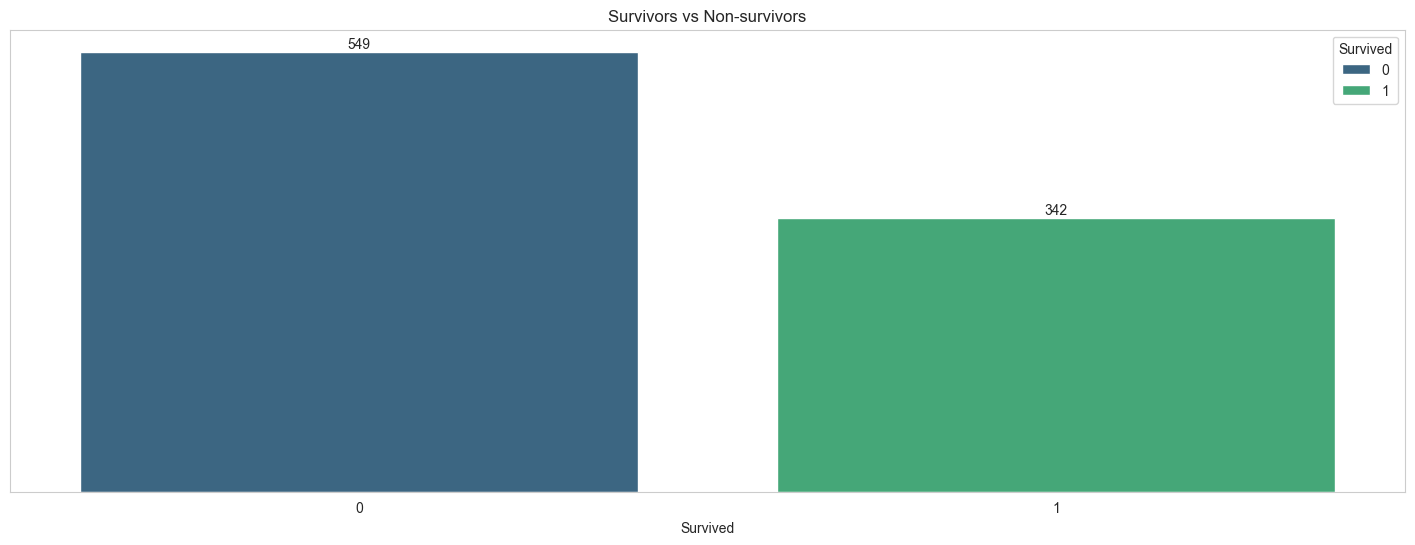

In [17]:
create_count_plot(dataframe=df_train,column='Survived',title='Survivors vs Non-survivors')

The data has an unequal proportion of the classes hence we'll need to stratify the data when splitting for the train and test split during model building.

**Total Number of passengers by different categories**

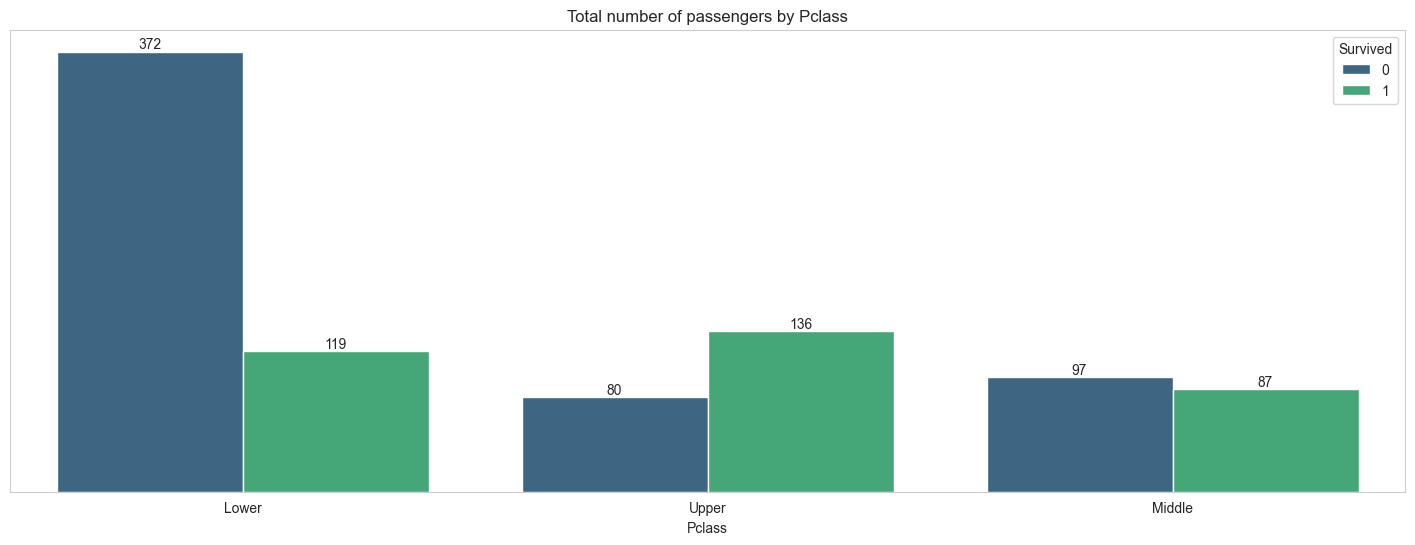

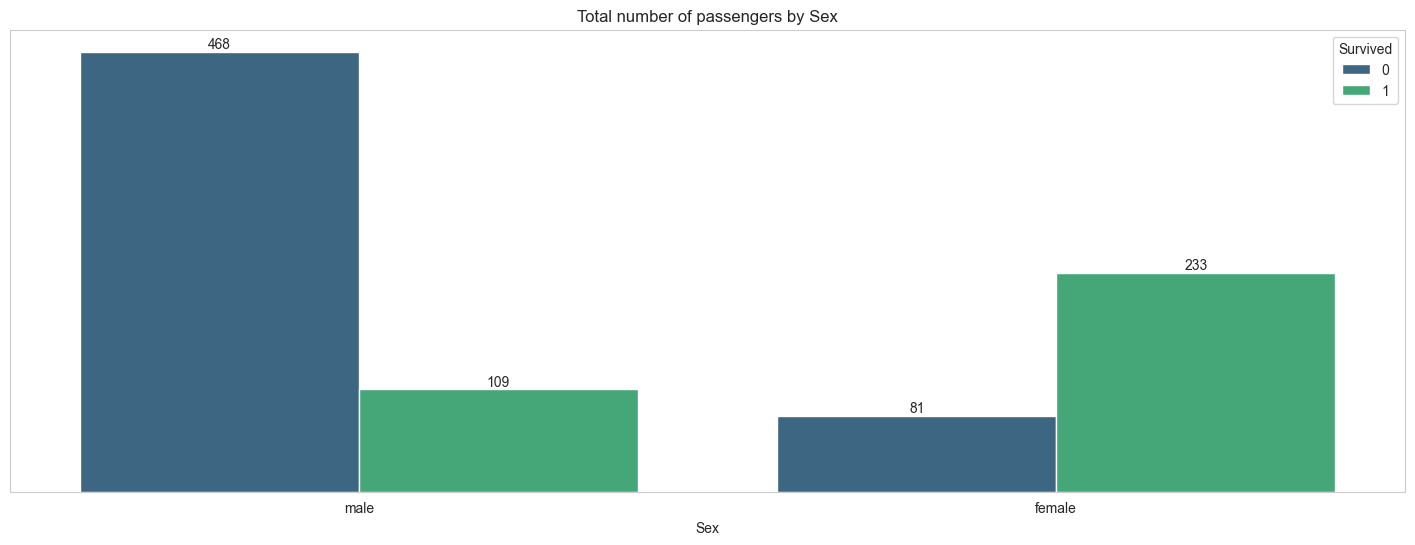

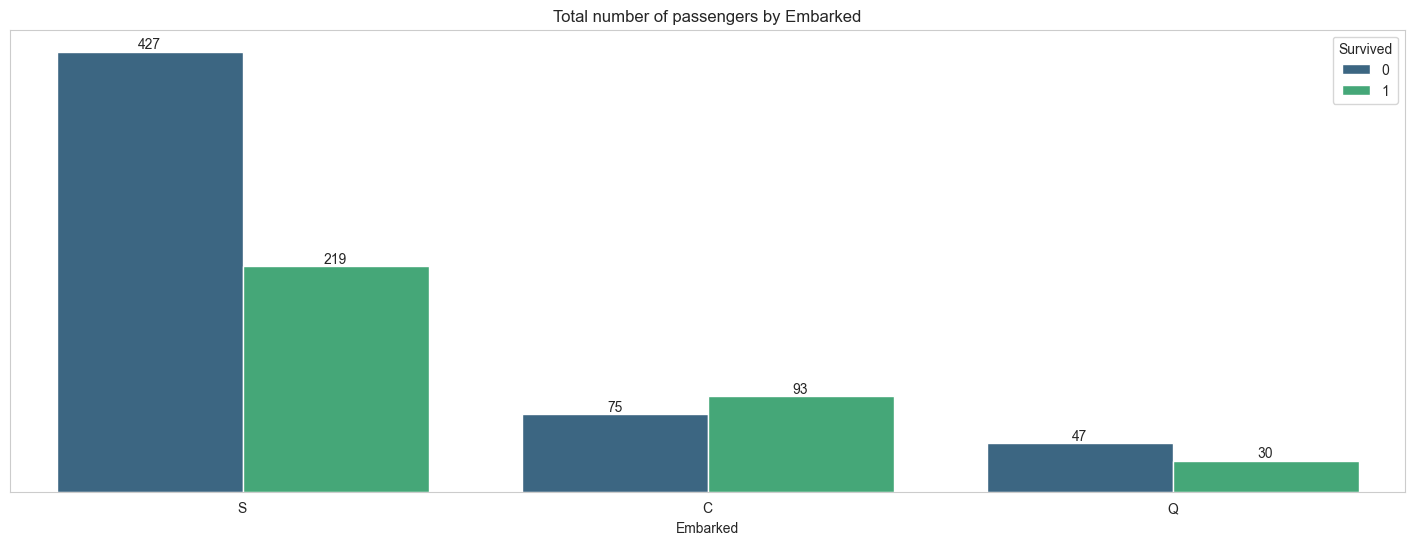

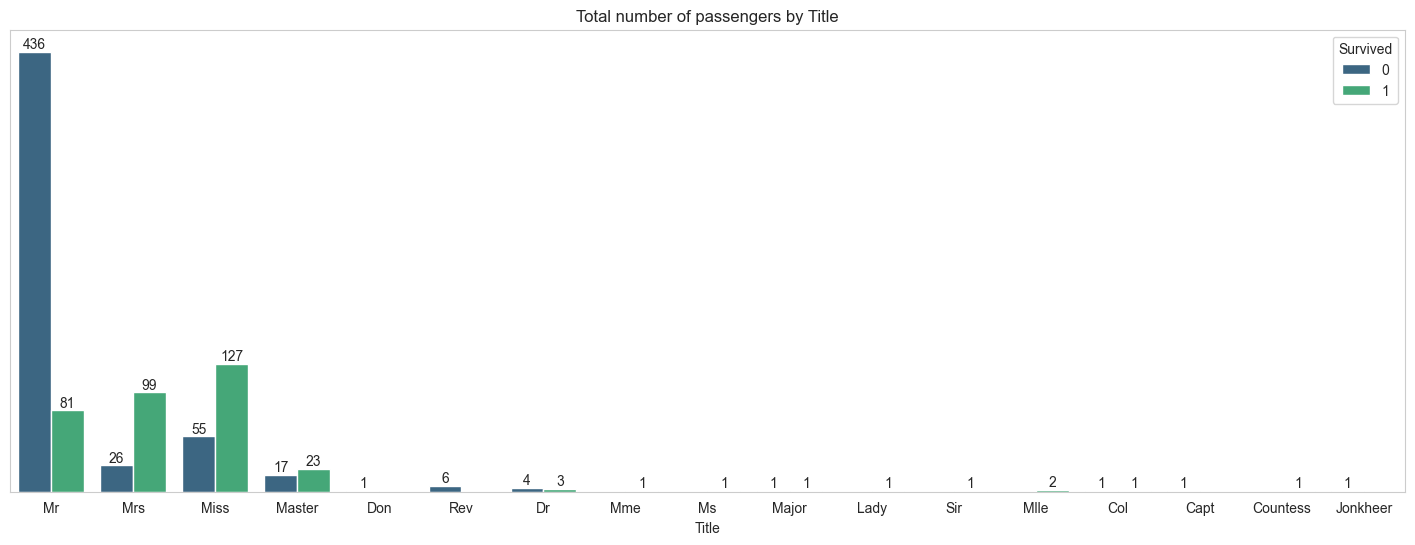

In [18]:
for col in categorical_columns:
  create_count_plot(dataframe=df_train,column=col,title=f'Total number of passengers by {col}')

It is commonly known that females and children were among the first to be saved when the **RMS Carpathia** arrived at the site of the incident. The visualisation supports this narrative.

There is a further imbalance in the distribution of the data based of the categorical columns, this means that we need to apply multiclass stratification when splitting the data into training and test sets.

**The distribution of Age**

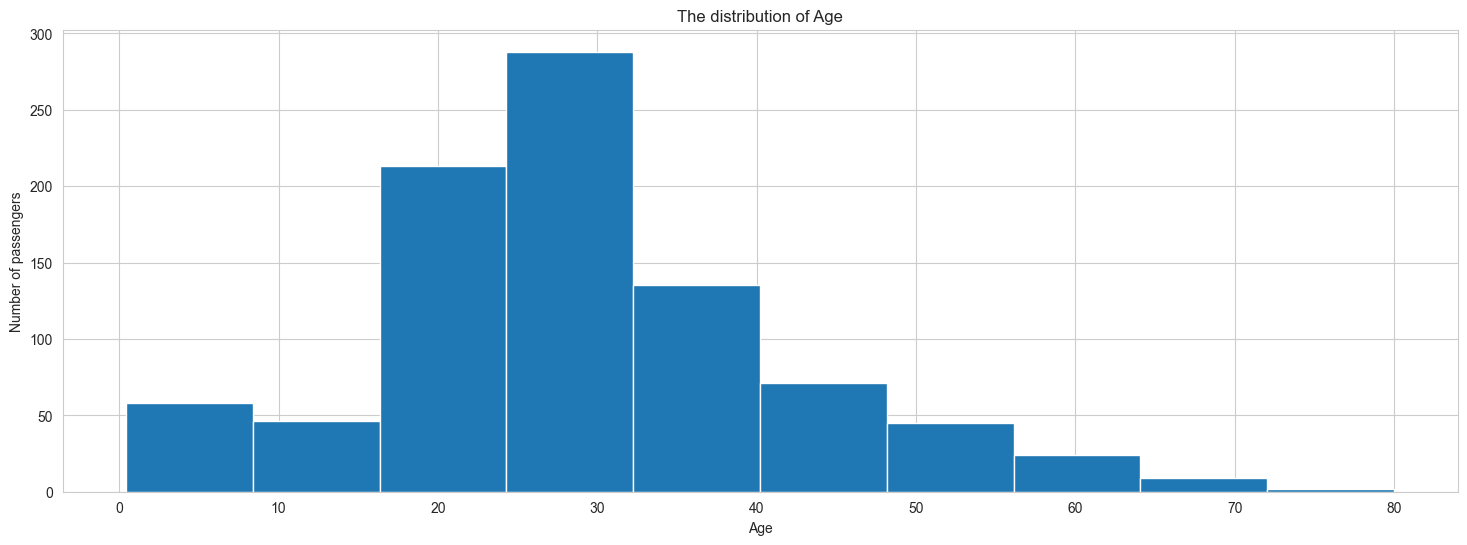

In [19]:
plt.figure(figsize=(18,6))
df_train['Age'].plot(kind='hist')
plt.title('The distribution of Age')
plt.ylabel('Number of passengers')
plt.xlabel('Age');

**The distribution of Fare**

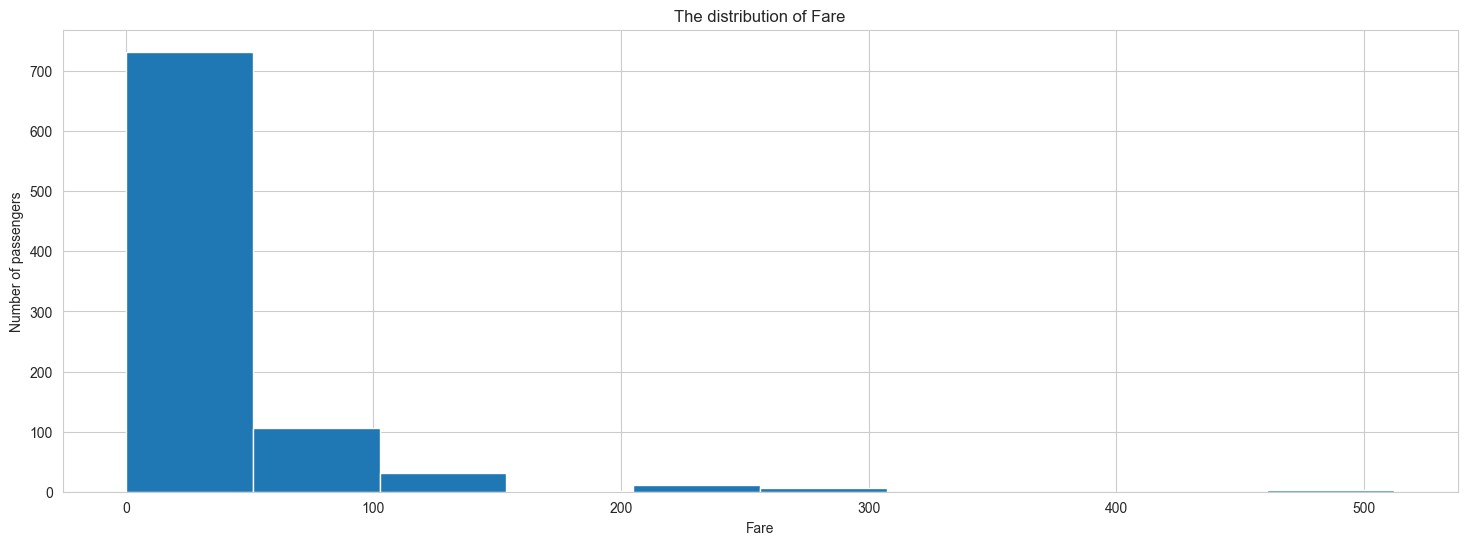

In [20]:
plt.figure(figsize=(18,6))
df_train['Fare'].plot(kind='hist')
plt.title('The distribution of Fare')
plt.ylabel('Number of passengers')
plt.xlabel('Fare');

**Fare by different passenger classes**

In [21]:
df_train.groupby('Pclass')['Fare'].describe().T

Pclass,Lower,Middle,Upper
count,491.000000,184.000000,216.000000
mean,13.675550,20.662183,84.154687
std,11.778142,13.417399,78.380373
min,0.000000,0.000000,0.000000
25%,7.750000,13.000000,30.923950
50%,8.050000,14.250000,60.287500
75%,15.500000,26.000000,93.500000
max,69.550000,73.500000,512.329200


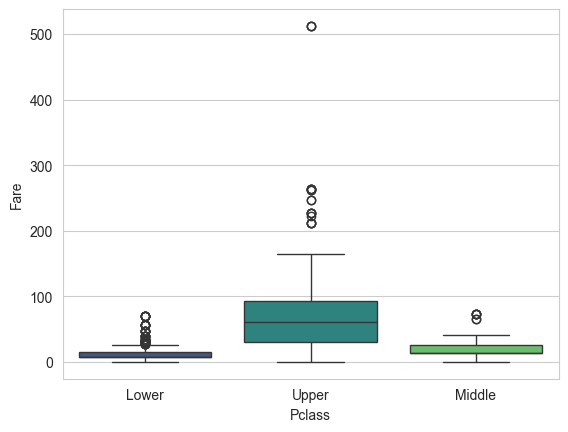

In [22]:
sns.boxplot(x='Pclass',y='Fare',data=df_train,palette='viridis',hue='Pclass')
plt.show();

## **Feature Engineering**

In [ ]:
# feature engineering
df_train.drop(columns=['Name','Ticket'],inplace=True)

In [ ]:
df_train['Family_size'] = df_train['SibSp'] + df_train['Parch'] + 1 # total number of relatives including siblings, parnets or children +1 to include the passenger themselves
df_train['Strata'] = df_train['Survived'].astype(str) + "_" + df_train['Sex'] + "_" + df_train['Pclass'].astype(str)
df_train['Age_category'] = pd.cut(df_train['Age'],bins=[0, 12, 18, 35, 60,np.inf],labels=['Child','Teenager','Young Adult','Adult','Senior'],right=False)


In [ ]:
df = pd.get_dummies(df_train,columns=['Pclass','Sex','Title','Embarked','Age_category'],drop_first=True)

In [ ]:
X = df.drop(columns=['Survived','Strata'])
y = df['Survived']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.55741976,  0.43279337, -0.47367361, ...,  0.84271748,
        -0.58469434, -0.17337186],
       [ 0.64941006,  0.43279337, -0.47367361, ..., -1.18663731,
         1.71029533, -0.17337186],
       [-0.25571231, -0.4745452 , -0.47367361, ...,  0.84271748,
        -0.58469434, -0.17337186],
       ...,
       [-0.63284663,  0.43279337,  2.00893337, ...,  0.84271748,
        -0.58469434, -0.17337186],
       [-0.25571231, -0.4745452 , -0.47367361, ...,  0.84271748,
        -0.58469434, -0.17337186],
       [ 0.19684888, -0.4745452 , -0.47367361, ...,  0.84271748,
        -0.58469434, -0.17337186]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify=df['Strata'],test_size=0.2,random_state=SEED)

### **Feature Selection**

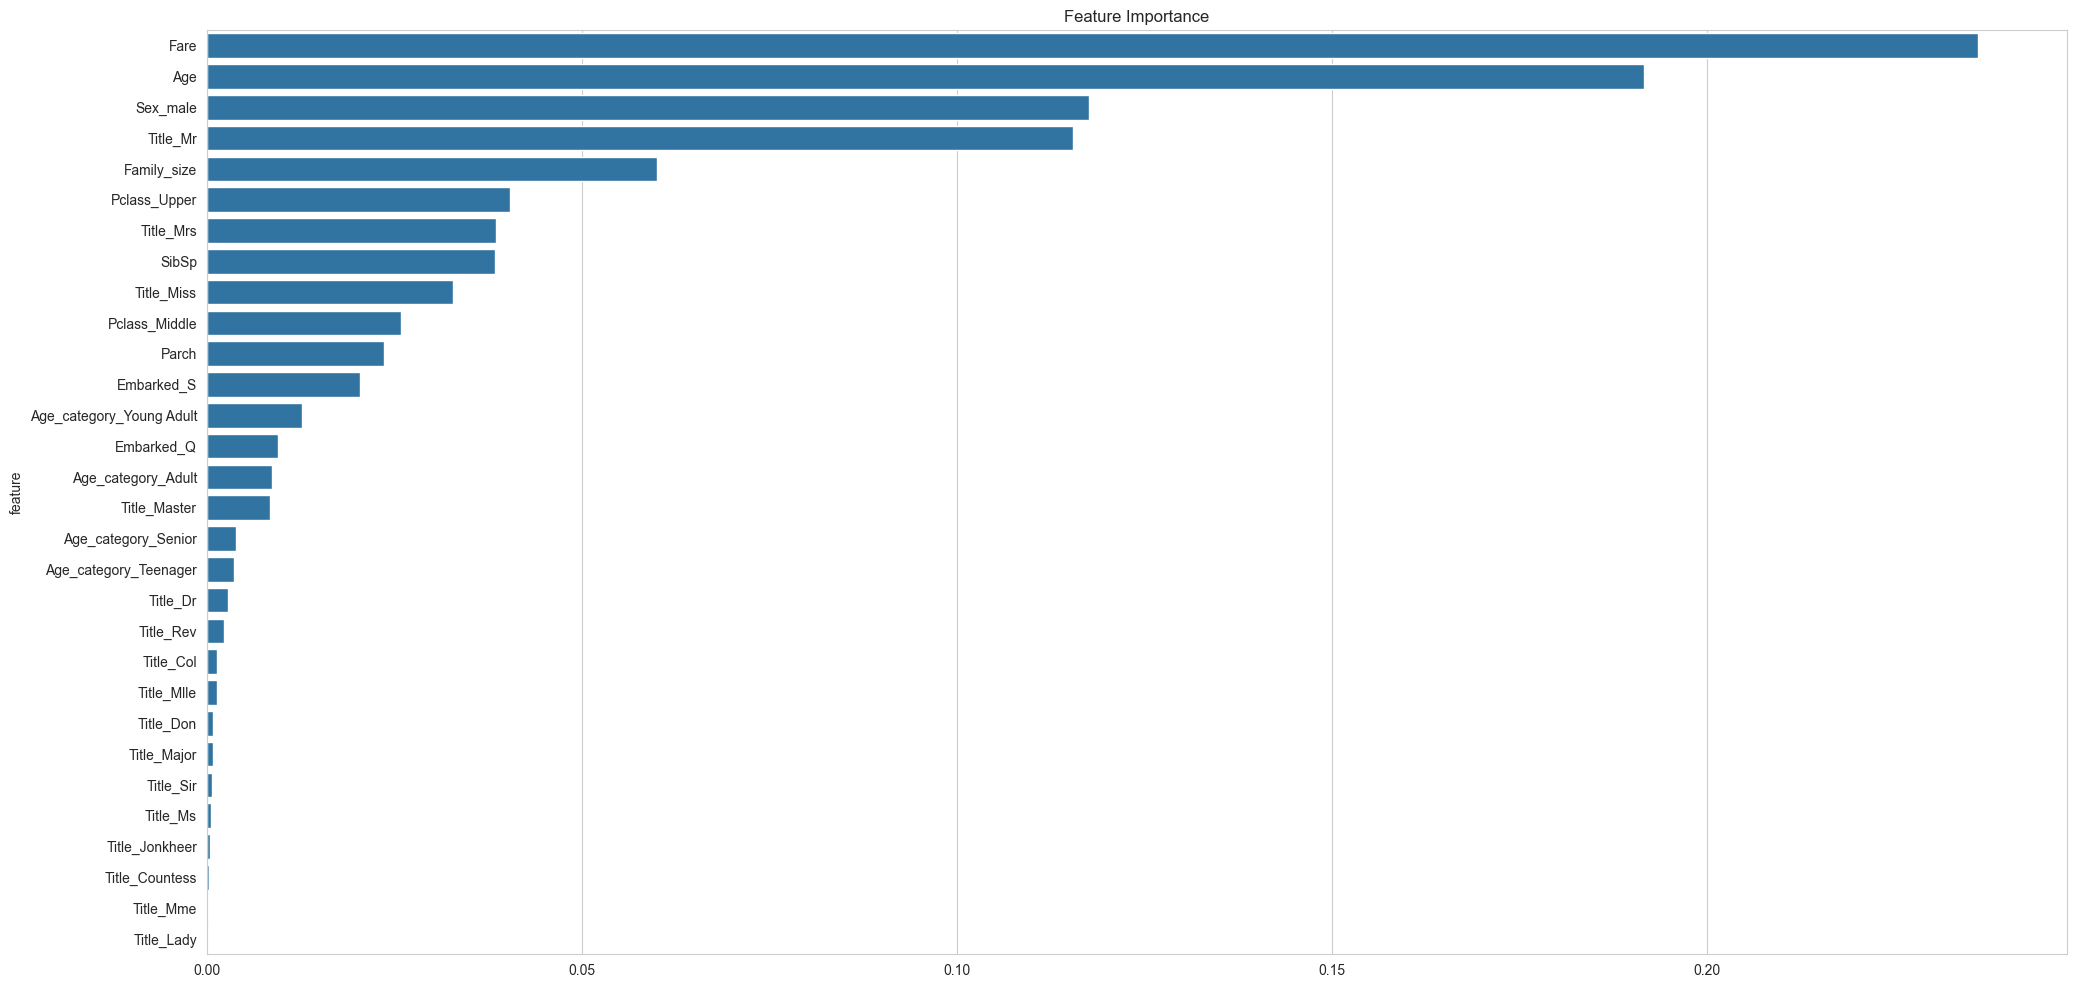

In [33]:
rf = RandomForestClassifier(random_state=SEED)
rf.fit(X_train, y_train)
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sorted_importances_rf = importances_rf.sort_values(ascending=False)
plt.figure(figsize=(24,12))
sns.barplot(y=sorted_importances_rf.index,x=sorted_importances_rf.values)
plt.title('Feature Importance')
plt.ylabel('feature')
plt.show();

In [34]:
features = list(importances_rf[importances_rf>=0.02].index)

In [ ]:
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify=df['Strata'],test_size=0.2,random_state=SEED)

### **Model Building**

In [36]:
models = {
  'Logistic Regression':LogisticRegression(random_state=SEED),
  'Decision Tree':DecisionTreeClassifier(random_state=SEED),
  'K Nearest Neighbors': KNeighborsClassifier(),
  'Support Vector Machine':SVC(random_state=SEED),
  'Random Forest': RandomForestClassifier(random_state=SEED),
  'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=SEED),
  'XGboost Classifier': XGBClassifier()
}
cv_results_mean = {}
cv_results_std = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name,model in models.items():
  cv_results_mean[model_name] = np.mean(cross_val_score(model,X_train,y_train,cv=kf,n_jobs=-1))
  cv_results_std[model_name] = np.std(cross_val_score(model,X_train,y_train,cv=kf,n_jobs=-1))

In [37]:
cv_results_mean

{'Logistic Regression': 0.8230473751600511,
 'Decision Tree': 0.7738402442627794,
 'K Nearest Neighbors': 0.8090022653402935,
 'Support Vector Machine': 0.8384615384615384,
 'Random Forest': 0.8286023835319609,
 'Gradient Boosting Classifier': 0.8314685314685313,
 'XGboost Classifier': 0.8160051216389244}

In [38]:
cv_results_std

{'Logistic Regression': 0.014848964203238404,
 'Decision Tree': 0.021874609325964356,
 'K Nearest Neighbors': 0.021863120259225752,
 'Support Vector Machine': 0.017402287666394643,
 'Random Forest': 0.023287924495266826,
 'Gradient Boosting Classifier': 0.031732108826334135,
 'XGboost Classifier': 0.025690066790897307}

#### **1. SVM**

In [ ]:
svm_params = {
    'C': [1, 10, 100],                  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],      # Kernel type
    'gamma': ['auto', 'scale'],  # Kernel coefficient for non-linear kernels
}

svm_random_search = RandomizedSearchCV(estimator=SVC(), param_distributions=svm_params,cv=kf, scoring='accuracy', n_jobs=-1)
svm_random_search.fit(X_train, y_train)

# Results
print("Best SVM Params:", svm_random_search.best_params_)
print("Best SVM Score:", svm_random_search.best_score_)

Best SVM Params: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}
Best SVM Score: 0.8384615384615384


#### **2. Gradient Boosting**

In [45]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Grid search for Gradient Boosting
gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator=gb, param_grid=gb_params, cv=kf, scoring='accuracy',n_jobs=-1)
gb_grid.fit(X_train, y_train)

# Print best parameters and score
print("Best Gradient Boosting Params:", gb_grid.best_params_)
print("Best Gradient Boosting Accuracy:", gb_grid.best_score_)

Best Gradient Boosting Params: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best Gradient Boosting Accuracy: 0.8497192947897172


#### **3. Random Forests**

In [44]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Grid search for Random Forest
rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=kf, scoring='accuracy',n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Print best parameters and score
print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Random Forest Accuracy:", rf_grid.best_score_)

Best Random Forest Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.8482911454742441


#### **4. XGBoost**

In [60]:
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],        # Learning rate
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],   # Maximum depth of the tree
    'min_child_weight': [1, 2, 3, 4, 5],     # Minimum child weight
    'subsample': [0.5, 0.7, 0.9],             # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 0.9],      # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 2, 3, 4, 5]                # Minimum loss reduction required to make a further partition
}

# Create the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,                                      # Number of parameter settings to sample
    scoring='accuracy',                             # Metric to evaluate
    n_jobs=-1,                                      # Use all processors
    cv=kf,                                           # Cross-validation folds
    verbose=1,                                     # Verbosity level
    random_state=42                                  # For reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Results
print("Best XGBoost Params:", random_search.best_params_)
print("Best XGBoost Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Params: {'subsample': 0.5, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7}
Best XGBoost Score: 0.8385009356840343


#### **Creating an ensemble**

In [ ]:
svm = SVC(**svm_random_search.best_params_, probability=True)
gb = GradientBoostingClassifier(**gb_grid.best_params_)
rf = RandomForestClassifier(**rf_grid.best_params_)
xgb = XGBClassifier(**random_search.best_params_)

# Create Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[
    ('svm', svm),
    ('gradient_boosting', gb),
    ('random_forest', rf),
    ('Xgboost',xgb)
], voting='soft')

# Train the ensemble and evaluate it
voting_clf.fit(X_train, y_train)
ensemble_score = cross_val_score(voting_clf, X_train, y_train, cv=kf, scoring='accuracy').mean()
print("Ensemble Model Accuracy:", ensemble_score)

Ensemble Model Accuracy: 0.8398995370826358


In [62]:
y_pred = voting_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8324022346368715


Gradient Boosting has the best model accuracy at 85%.

**Fitting Gradient Boost to the test set**

In [64]:
gb = GradientBoostingClassifier(**gb_grid.best_params_)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(f'The test accuracy of the Gradient Boosting Algorithm is: {accuracy}')

The test accuracy of the Gradient Boosting Algorithm is: 0.8324022346368715


### **Packaging the pre-processing steps into a function**

In [109]:
df_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [166]:
file_path = r'C:\Users\user pc\Desktop\My Projects\Titanic Survival Dataset\test.csv'
df_test = pd.read_csv(file_path,index_col=0)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [167]:
rf = RandomForestClassifier(**rf_grid.best_params_)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [168]:
def preprocess_test_data(dataset):
    '''The function takes the dataset as the argument and performs a series of preprocessing steps.
    Aligns the test set dataset with the training set
    Output: predictions of a model packaged into a dataframe'''

    # dropping the cabin column
    dataset.drop(columns=['Cabin'],inplace=True)

    # Extracting titles and imputing Age based on titles
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
        
    # Imputing Age
    mean_age = dataset['Age'].mean()
    dataset.fillna({'Age':mean_age},inplace=True)
    # Imputing the missing fare value
    mean_fare = dataset['Fare'].mean()
    dataset.fillna({'Fare':mean_fare},inplace = True)
    
    # Assert that there are no missing values left
    assert dataset.isna().sum().values.sum() == 0, "There are still missing values!"

    # Converting the Pclass to represent social classes
    social_class_map = {1: 'Upper', 2: 'Middle', 3: 'Lower'}
    dataset['Pclass'] = dataset['Pclass'].map(social_class_map)

    # Feature engineering
    dataset.drop(columns=['Name', 'Ticket'], inplace=True)
    dataset['Family_size'] = dataset['SibSp'] + dataset['Parch'] + 1  # Total number of relatives + 1 for the passenger themselves
    # One-hot encoding
    dataset = pd.get_dummies(dataset, columns=['Pclass', 'Sex', 'Title', 'Embarked'], drop_first=True)

    # data preprocessing for modelling
    X = dataset[features]
    # fitting model
    y_pred = rf.predict(X)
    # creating dataframe of predictions
    passenger_ids = list(dataset.index)
    data = {'PassengerId':passenger_ids,'Survived':y_pred}    
    predictions = pd.DataFrame(data)
    # Saving the predictions to a CSV file
    predictions.to_csv('submission.csv', index=False)

    return predictions


In [169]:
preprocess_test_data(df_test)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
